## Exploratory Data Analysis ## 

In this step we are going to deepen our analysis on the data by using two methods:

1. Pivoting features
    - This method allows us to deepen our understanding about the correlation between features. It makes sense to apply it for the categorical features: 'hotel_cluster', 'hotel_continent', 'hotel_country', 'hotel_market', 'is_mobile', 'is_package','channel', 'posa_continent', 'site_name', 'srch_destination_id', 'srch_destination_type_id', 'user_id', 'user_location_city', 'user_location_country', 'user_location_region'
1. Visualizing the data
    - In this step we will use visualization techniques to extract insights about the correlation between numerical and categorical features

### Pivoting Features ###

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import dataset

df = pd.read_csv('./clean_data.csv',parse_dates=[0,16,17], dayfirst=True)

In [4]:
#hotel clusters are not contrained by location
#the same cluster includes several different cotinents and countries

pd.pivot_table(df, index='hotel_cluster', values=['hotel_continent','hotel_country'], aggfunc=pd.Series.nunique).sort_values('hotel_continent', ascending = False)

,hotel_continent,hotel_country
hotel_cluster,,
30,7,105
86,6,54
60,6,58
31,6,27
85,6,75
...,...,...
24,1,1
88,1,1
79,1,1


In [5]:
#one hotel market is in more than one continent or country, but for all other records hotel markets are inside only one country

pd.pivot_table(df, index='hotel_market', values=['hotel_continent','hotel_country'], aggfunc=pd.Series.nunique).sort_values('hotel_continent', ascending = False)

,hotel_continent,hotel_country
hotel_market,,
0,2,3
1,1,1
1351,1,1
1350,1,1
1349,1,1
...,...,...
652,1,1
651,1,1
650,1,1


In [153]:
pd.pivot_table(df, index='hotel_country', values=['hotel_continent'], aggfunc=pd.Series.nunique).sort_values('hotel_country', ascending = False)

,hotel_continent
hotel_country,
212,1
211,1
210,1
208,1
206,1
...,...
5,1
4,1
2,1


In [6]:
pd.pivot_table(df, index='hotel_continent', values=['hotel_country','hotel_market'], aggfunc=pd.Series.nunique).sort_values(['hotel_market'], ascending = False)

,hotel_country,hotel_market
hotel_continent,,
2,2,812
6,51,478
3,33,270
4,47,209
0,13,100
5,37,51
1,1,1


In [7]:
#the popularity (number of bookings) of the geographical locations appears to have correlation with the number of hotel markets

pd.pivot_table(df, index=['hotel_continent'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

,date_time
hotel_continent,
2,86210
6,25326
3,17284
4,9851
0,2427
5,1509
1,1


In [8]:
#hotel country 50 in continent 2 represents more than 50% of all bookings in the dataset

df_pivot = pd.pivot_table(df, index=['hotel_continent','hotel_country'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

count  percent
hotel_continent hotel_country                
2               50             75425    52.89
                198            10785     7.56
6               70              4938     3.46
4               8               3867     2.71
6               105             3660     2.57
...                              ...      ...
4               157                1     0.00
                188                1     0.00
                173                1     0.00
                61                 1     0.00
5               10                 1     0.00

[184 rows x 2 columns]

In [9]:
#the distribution by markets seems less unequal

df_pivot = pd.pivot_table(df, index=['hotel_country','hotel_market'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

count  percent
hotel_country hotel_market                
50            628            6571     4.61
              675            5043     3.54
              365            3292     2.31
70            19             2905     2.04
50            1230           2472     1.73
...                           ...      ...
8             261               1     0.00
63            1458              1     0.00
              1432              1     0.00
              1428              1     0.00
104           1699              1     0.00

[1939 rows x 2 columns]

In [10]:
#the distribution by clusters is even less unequal, as expected since it is not constrained by geographical location of the hotels

df_pivot = pd.pivot_table(df, index=['hotel_cluster'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

,count,percent
hotel_cluster,,
91,5842,4.10
48,4197,2.94
59,3661,2.57
42,3649,2.56
95,2998,2.10
...,...,...
53,242,0.17
80,230,0.16
87,213,0.15


In [11]:
#every sitename is associatead with only one continent, it may indicate the domain of the websites, but it is hard to grap the meaning of 'posa_continent'

pd.pivot_table(df, index='site_name', values=['posa_continent'], aggfunc=pd.Series.nunique)

,posa_continent
site_name,
2,1
6,1
7,1
8,1
9,1
10,1
11,1
13,1
14,1


In [12]:
#'posa_continent' doesn't seem to have a direct relationship with 'chanel' 

pd.pivot_table(df, index='channel', values=['posa_continent'], aggfunc=pd.Series.nunique)

,posa_continent
channel,
0,5
1,5
2,5
3,5
4,4
5,5
6,2
7,4
8,5


In [13]:
#'posa_continent' also does not show a relationship with user's country

#given the lack of meaning we may drop this feature from the dataset

pd.pivot_table(df, index='user_location_country', values=['site_name'], aggfunc=pd.Series.nunique)

,site_name
user_location_country,
0,11
1,13
3,12
4,2
5,9
...,...
235,6
236,2
237,3


In [14]:
#channel 9 accounts for more than 65% of bookings

df_pivot = pd.pivot_table(df, index=['channel'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

,count,percent
channel,,
9,92320,64.74
0,14354,10.07
1,12357,8.67
5,8537,5.99
2,6154,4.32
4,5133,3.60
3,2680,1.88
8,456,0.32
7,435,0.31


In [15]:
#site_name 2 accounts for around 64% of bookings

df_pivot = pd.pivot_table(df, index=['site_name'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}).head()

,count,percent
site_name,,
2,91136,63.91
11,11211,7.86
34,9854,6.91
37,8312,5.83
24,7840,5.50


In [16]:
#posa_continent accounts for around 79% of bookings

df_pivot = pd.pivot_table(df, index=['posa_continent'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

,count,percent
posa_continent,,
3,112427,78.84
1,16561,11.61
2,9624,6.75
4,3456,2.42
0,540,0.38


In [17]:
#region does not seem constrained by one single country
pd.pivot_table(df, index='user_location_region',values=['user_location_country'], aggfunc=pd.Series.nunique).sort_values('user_location_country', ascending = False)

,user_location_country
user_location_region,
0,26
38,19
10,15
40,13
13,12
...,...
452,1
451,1
450,1


In [18]:
#some user's cities are linked to more than one country, which is maybe an indication of data inconsistency

pd.pivot_table(df, index='user_location_city',values=['user_location_country'], aggfunc=pd.Series.nunique).sort_values('user_location_country', ascending = False)

,user_location_country
user_location_city,
26750,17
55763,6
53078,5
10377,4
39443,4
...,...
19186,1
19195,1
19197,1


In [19]:
#the distribution by user's country show that most of 50% bookings are done by users from the same country

df_pivot = pd.pivot_table(df, index=['user_location_country'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

,count,percent
user_location_country,,
66,74712,52.39
205,19510,13.68
69,7556,5.30
3,7373,5.17
1,2955,2.07
...,...,...
25,1,0.00
135,1,0.00
207,1,0.00


In [20]:
# most users are booking only once during the period in the dataset, but there are users with more than 10 bookings
# this might indicate the actions of travel agencies using the platform

df_pivot = pd.pivot_table(df, index=['user_id'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

,count
user_id,
191631,52
89383,45
100555,43
489753,37
215180,37
...,...
277400,1
277385,1
715184,1


<AxesSubplot:>

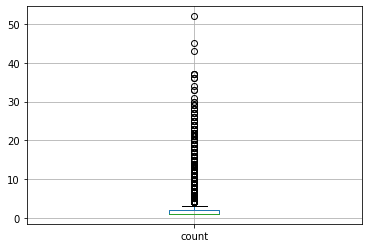

In [21]:
# a boxplot help us to see that the behavior of suposed travel agencies are far different from the average user
# to focus the analysis over individual users we could set a treashold and drop records of users that have more than a certain of bookings over a given period of time
# given the relatively small size of the dataset we will keep those users for now, but this is an important point to keep in mind since it can impact prediction models

df_pivot.boxplot()

In [23]:
# the most popular country of origin are always the country with more unique users
# this shows us that individual users still have more impact than travel agencies according to this sample

df_pivot = pd.pivot_table(df, index=[]'user_location_country', values=['user_id'], aggfunc=pd.Series.nunique).sort_values('user_id', ascending = False)

df_pivot['percent'] = round((df_pivot['user_id'] / df_pivot['user_id'].sum()) * 100,2)

df_pivot

,user_id,percent
user_location_country,,
66,39319,52.55
205,10583,14.14
69,3858,5.16
3,3564,4.76
46,1548,2.07
...,...,...
207,1,0.00
78,1,0.00
212,1,0.00


In [24]:
#the distribution by region less unequal

df_pivot = pd.pivot_table(df, index=['user_location_region'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'})

,count,percent
user_location_region,,
174,14985,10.51
354,7948,5.57
348,5929,4.16
442,5497,3.85
220,5127,3.60
...,...,...
111,1,0.00
113,1,0.00
853,1,0.00


In [25]:
#the distribution by city is less unequal but still show some cities concentrate most of the bookings

df_pivot = pd.pivot_table(df, index=['user_location_city'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

,count,percent
user_location_city,,
5703,2624,1.84
48862,2413,1.69
25315,1815,1.27
36086,1652,1.16
24103,1581,1.11
...,...,...
31944,1,0.00
31903,1,0.00
31889,1,0.00


In [26]:
 #the 3 most bookeds destinations are in the most visited country

df_pivot = pd.pivot_table(df, index=['hotel_country','srch_destination_id'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

count  percent
hotel_country srch_destination_id                
50            8250                  4856     3.41
              8267                  2905     2.04
              8279                  1362     0.96
70            8253                  1346     0.94
50            12206                 1286     0.90
...                                  ...      ...
63            43457                    1     0.00
50            4333                     1     0.00
63            43208                    1     0.00
              43173                    1     0.00
212           61518                    1     0.00

[11176 rows x 2 columns]

In [27]:
 #one type of destination is object of more than 50% of bookings

df_pivot = pd.pivot_table(df, index=['srch_destination_type_id'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

,count,percent
srch_destination_type_id,,
1,74354,52.14
6,39202,27.49
3,12572,8.82
5,11891,8.34
4,4301,3.02
8,288,0.20


In [28]:
#around 13% of bookings are travel packages

df_pivot = pd.pivot_table(df, index=['is_package'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

,count,percent
is_package,,
0,124284,87.15
1,18324,12.85


In [29]:
#travel packages are more popular for the more popular countries, which is not an unexpected correlation

df_pivot = pd.pivot_table(df[df['is_package']==1], index=['is_package','hotel_country'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

count  percent
is_package hotel_country                
1          50              9068    49.49
           8               1512     8.25
           198              733     4.00
           77               543     2.96
           70               480     2.62
...                         ...      ...
           148                1     0.01
           27                 1     0.01
           39                 1     0.01
           165                1     0.01
           89                 1     0.01

[140 rows x 2 columns]

In [30]:
#around 9.2% of bookings are done on mobile devices

df_pivot = pd.pivot_table(df, index=['is_mobile'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot['percent'] = round((df_pivot['date_time'] / df_pivot['date_time'].sum()) * 100,2)

df_pivot.rename(columns={'date_time': 'count'}, inplace = True)

df_pivot

,count,percent
is_mobile,,
0,129486,90.8
1,13122,9.2


In [31]:
#mobile devices seem more used on some less popular origin countries
# even though this may be due to the small sample for these countries,it can be an interesting insight to be confirmed with more data

# check countries with more mobile bookings
df_pivot_sum = pd.pivot_table(df, index=['user_location_country'], values=['is_mobile'], aggfunc='sum').sort_values('is_mobile', ascending = False)

# count total of bookings for each country
df_pivot_count = pd.pivot_table(df, index=['user_location_country'], values=['is_mobile'], aggfunc='count').sort_values('is_mobile', ascending = False)

# calculate the relative usage of mobile bookings per country
df_pivot_count['percent_mobile'] = round((df_pivot_sum['is_mobile']/df_pivot_count['is_mobile'])*100,2)
df_pivot_count.rename(columns={'is_mobile': 'count'}, inplace = True)

# filter for countries with more than 500 records to avoid outliers
df_pivot_count[df_pivot_count['count']>500].sort_values('percent_mobile', ascending = False).head(10)


,count,percent_mobile
user_location_country,,
70,526,15.97
215,2554,12.96
55,606,12.87
12,657,12.18
80,665,11.88
154,527,10.63
198,621,9.98
231,1144,9.79
66,74712,9.53


### Pivoting Features ###

- Continuous: 'orig_destination_distance'
- Discrete: 'srch_adults_cnt','srch_children_cnt','srch_rm_cnt'
- Categorical: is_package, is_mobile

In [32]:
#Correlation Matrix to help understand the correlation between numerical features

df[['is_package','is_mobile','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','orig_destination_distance','days_in_adv','days_stay']].corr()

,is_package,is_mobile,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,orig_destination_distance,days_in_adv,days_stay
is_package,1.000000,-0.003848,-0.046707,-0.069610,-0.034512,-0.001305,0.124393,0.298480
is_mobile,-0.003848,1.000000,0.047199,0.015775,-0.014359,-0.042934,-0.029155,-0.024666
srch_adults_cnt,-0.046707,0.047199,1.000000,0.141622,0.556622,0.000935,0.150841,0.028747
srch_children_cnt,-0.069610,0.015775,0.141622,1.000000,0.070974,0.008202,0.118272,0.042702
srch_rm_cnt,-0.034512,-0.014359,0.556622,0.070974,1.000000,-0.001086,0.040534,-0.007635
orig_destination_distance,-0.001305,-0.042934,0.000935,0.008202,-0.001086,1.000000,0.175110,0.127244
days_in_adv,0.124393,-0.029155,0.150841,0.118272,0.040534,0.175110,1.000000,0.229956
days_stay,0.298480,-0.024666,0.028747,0.042702,-0.007635,0.127244,0.229956,1.000000


<AxesSubplot:>

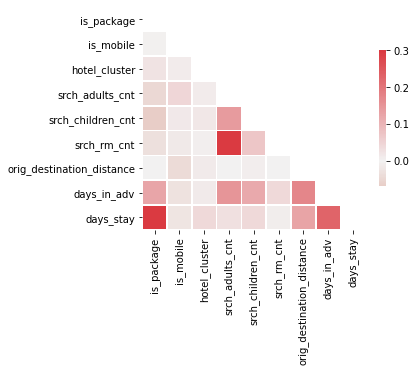

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['is_package','is_mobile','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','orig_destination_distance','days_in_adv','days_stay']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 11, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [34]:
df.columns

Index(['date_time', 'hotel_cluster', 'hotel_continent', 'hotel_country',
       'hotel_market', 'is_mobile', 'is_package', 'orig_destination_distance',
       'channel', 'posa_continent', 'site_name', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'srch_rm_cnt', 'srch_ci', 'srch_co', 'days_stay', 'days_in_adv',
       'user_id', 'user_location_city', 'user_location_country',
       'user_location_region'],
      dtype='object')

In [148]:
df_cat = df[['days_stay','srch_children_cnt','srch_adults_cnt','srch_rm_cnt','site_name','channel','hotel_cluster','is_package']]

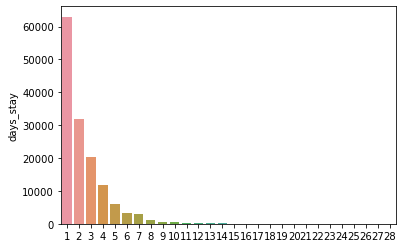

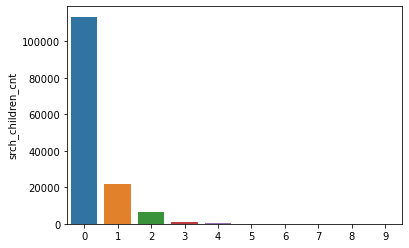

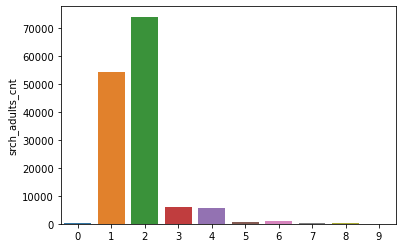

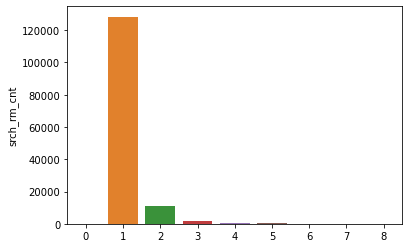

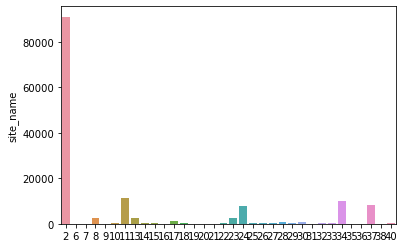

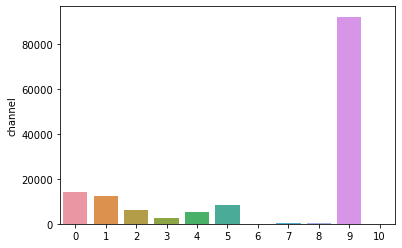

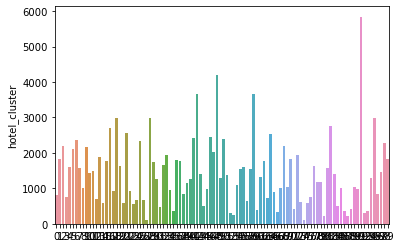

In [150]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

<AxesSubplot:xlabel='date_time'>

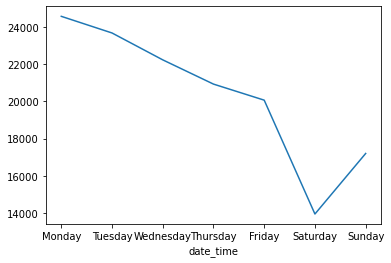

In [157]:
#Ploting the number of bookings by days of the week

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekdays = df['date_time'].groupby([df.date_time.dt.day_name()]).agg('count')

df_weekdays = df_weekdays.reindex(index = cats)

df_weekdays.plot()

<AxesSubplot:xlabel='date_time'>

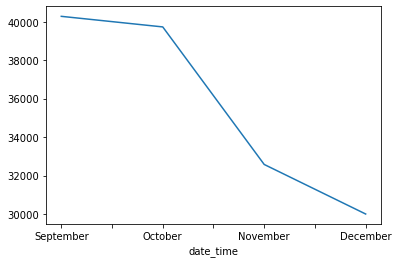

In [156]:
#Ploting the number of bookings by month

cats = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

df_monthly = df['date_time'].groupby([df.date_time.dt.month_name()]).agg('count')

df_monthly = df_monthly.reindex(index = cats)

df_monthly.plot()


<AxesSubplot:xlabel='srch_ci'>

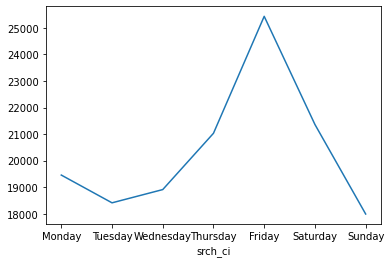

In [160]:
#Plotting the number of checkins by days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekdays = df['srch_ci'].groupby([df.srch_ci.dt.day_name()]).agg('count')

df_weekdays = df_weekdays.reindex(index = cats)

df_weekdays.plot()

<AxesSubplot:xlabel='srch_co'>

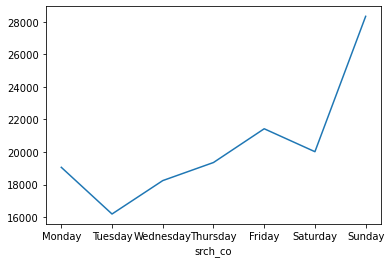

In [159]:
#Plotting the number of checkouts by days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekdays = df['srch_co'].groupby([df.srch_co.dt.day_name()]).agg('count')

df_weekdays = df_weekdays.reindex(index = cats)

df_weekdays.plot()

<AxesSubplot:xlabel='srch_ci'>

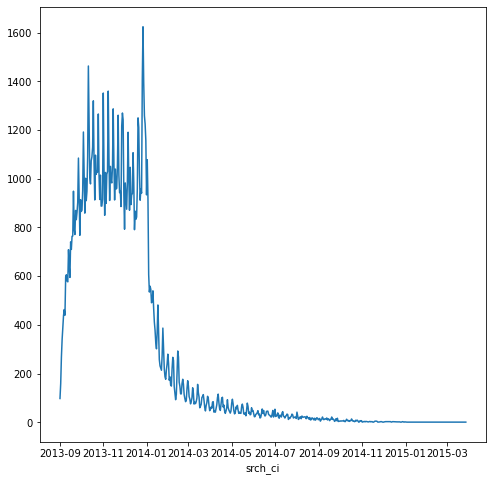

In [162]:
#Ploting the number of bookings by date

df_monthly = df['srch_ci'].groupby([df.srch_ci.dt.date]).agg('count')

df_monthly.plot(figsize=[8,8])

In [163]:
#the distribution by region less unequal

df_pivot = pd.pivot_table(df, index=['srch_ci'], values=['date_time'], aggfunc='count').sort_values('date_time', ascending = False)

df_pivot.rename(columns={'date_time': 'count'})

,count
srch_ci,
2013-12-27,1624
2013-10-11,1463
2013-12-26,1404
2013-12-28,1395
2013-11-08,1360
...,...
2014-12-12,1
2014-11-16,1
2014-11-17,1
